# DU-GD法 (勾配法に対する深層展開の適用)


Copyright (c) 2022 Tadashi Wadayama  
Released under the MIT license  
https://opensource.org/licenses/mit-license.php

In [1]:
using LinearAlgebra
using Plots
gr()
using Random
Random.seed!(1)
using Flux

ここでは、目的関数
$
f(x) = x^2
$
の最小化を勾配法で行う。

次の関数GDは、勾配法のプロセスである。

In [2]:
function GD(max_itr,x0, eta)
    x = x0
    for i in 1:max_itr
        x = x - 2*eta[1]*x
    end
    return x^2
end

GD (generic function with 1 method)

### 訓練関数の定義

In [3]:
function train(opt, eta, max_itr, train_itr)
    ps = Flux.params(eta) 
    l = []
    for i in 1:train_itr
        push!(l,eta[1])
        gs = Flux.gradient(ps) do
            GD(max_itr, randn(), eta)
        end
        Flux.Optimise.update!(opt, ps, gs)    
    end  
    return l
end

train (generic function with 1 method)

## 学習過程と学習結果の表示

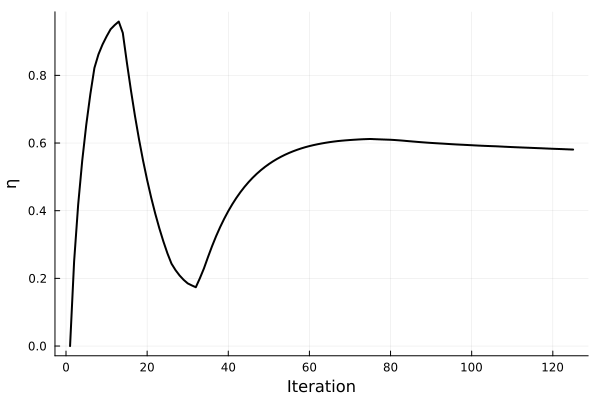

In [4]:
opt = Flux.ADAM(0.25) 
eta = [0.0]
train_itr = 125
l = train(opt, eta, 3, train_itr)
plot(1:train_itr,l, xlabel="Iteration", ylabel="η",legend=false, lw=2,color=:black)

In [5]:
savefig("DU-GD.pdf")

"/Users/wadayama/Dropbox/DU-Book_test/Chapter_3/DU-GD.pdf"